In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Install xgboost if not present: !pip install xgboost

# Initialize models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit models
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("Logistic Regression:")
evaluate(logreg, X_test, y_test)

print("\nSVM:")
evaluate(svm, X_test, y_test)

print("\nRandom Forest:")
evaluate(rf, X_test, y_test)

print("\nXGBoost:")
evaluate(xgb, X_test, y_test)


Logistic Regression:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC AUC: 0.99737962659679

SVM:
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112
ROC AUC: 0.99737962659679

Random Forest:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC: 0.995250573206682

XGBoost:
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
ROC AUC: 0.9908286930887652


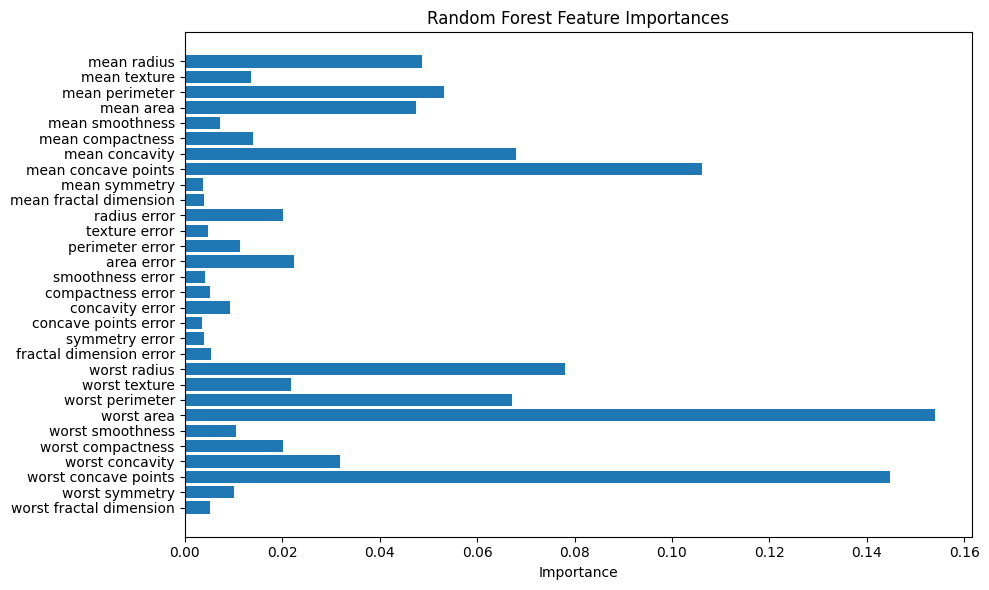

In [5]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = data.feature_names

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
